**Sklearn Kmeans implementation**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

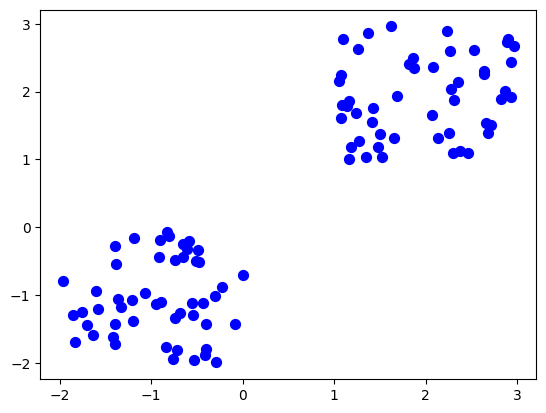

In [91]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


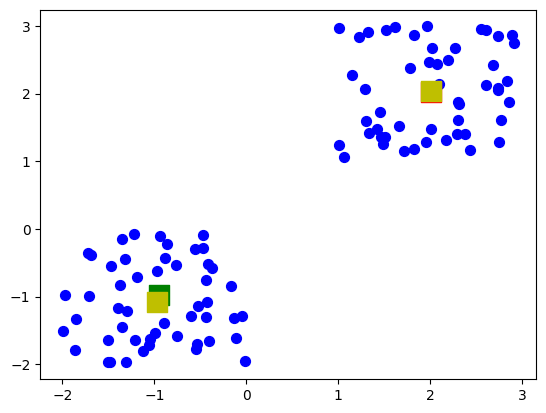

In [32]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')

plt.show()

In [78]:
Kmean.cluster_centers_

array([[ 2.01046706,  2.03623653],
       [-0.97462407, -1.08258618]])

In [43]:
df=pd.DataFrame(X,columns=['x','y'])
np.random.seed(42)
# Step-1
k=2


  **Without libraries implementation**
1.   Choose k; number of clusters.
2.   Randomly take k observations and assume they are centroids.
3.   Calculate the distance of all the observations to all the centroids.
4.   Assign the observation to the nearest centroid.
5.   Find the new centroid by calculating the mean of within cluster observartions.
6.   Repeat 3-5 until centroids position does not change.



In [48]:
# Step-2

def initialize_centroids(k,data):
  try:
    centroids=data.sample(k)
    return centroids
  except:
    print(f"Error in intialize_centroids"-{})


,x,y
48,-0.129997,-1.322714
28,-0.898161,-1.389163


In [57]:
def calculate_rmse(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays

    '''
    return np.square(np.sum((a-b)**2)) 


In [70]:

# Caculate the distance between all the observations from each centroid

def calc_centroids(centroids,data):
  new_centroids=[]
  dist_error = []
  for row in range(data.shape[0]): # for each observation
    all_errors=np.array([])
    for center in range(centroids.shape[0]): # for each centroid

      error= calculate_rmse(centroids.iloc[center, :], data.iloc[row,:])  # calculate the distance of the observation from each centroid
      all_errors = np.append(all_errors, error)                           # list of all errors 

    closest_centroid= np.where(all_errors==np.amin(all_errors))[0].tolist()[0]  # amin gives the minimum value in the list of errors for each observation.
    closest_centroid_error= np.amin(all_errors)

    new_centroids.append(closest_centroid)
    dist_error.append(closest_centroid_error)

  return new_centroids,dist_error


[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.0556138008509892, 6.894668066870302e-05, 0.020868176071902146, 3.043050014756192, 0.005643929061265634, 0.016774699324700895, 1.8489692612224913, 0.178702341057369, 0.010363141242439275, 0.07728033874977401, 0.053040355875934954, 2.710108913726537, 0.0856048889535216, 0.18357392034478348, 0.2514529493996892, 0.008546628433464386, 0.8383242064106388, 0.03617995745011672, 0.670848218638553, 0.1654787224121294, 1.4475198264651992, 1.493241847618816, 1.1549767152276766, 3.399276934695239, 0.548675209268464, 0.03342066089416584, 0.49018909591033927, 0.5346784719062032, 0.0, 0.001046042106832795, 0.3700026554247237, 1.744063176950339, 0.03527146188619048, 0.30803387272230165, 0.025732591273102

In [71]:
def kmeans_model(data,k,tol=1e-4):

  working_df=data.copy()

  error=[]
  flag=True
  j=0
  
  centroids= initialize_centroids(k,working_df)

  while(flag):
        # Step 3 and 4 - Assign centroids and calculate error
        working_df['centroid'], j_err = calc_centroids(centroids,working_df)
        error.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_df.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if error[j-1]-error[j]<=tol:
                flag = False
        j+=1

  working_df['centroid'], j_err = calc_centroids(centroids,working_df)
  centroids = working_df.groupby('centroid').agg('mean').reset_index(drop = True)
  
  return working_df['centroid'], j_err, centroids

In [75]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans_model(df[['x','y']], 2)
df.head()

,x,y,centroid,error
0,-0.168148,-0.838596,1,0.504008
1,-0.043936,-1.292764,1,0.828747
2,-0.426946,-1.085481,1,0.089976
3,-1.723139,-0.357734,1,1.178712
4,-1.043163,-1.621758,1,0.087263


In [88]:
pd.DataFrame(Kmean.cluster_centers_,columns=['x','y'])

,x,y
0,2.010467,2.036237
1,-0.974624,-1.082586


In [89]:
centroids

,x,y
0,2.010467,2.036237
1,-0.974624,-1.082586
